# Copyright

<PRE>
Copyright (c) 2020 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>



# Boston housing prices - modeling
In this notebook we will: 
* using Boston housing data (https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)
* exploring the data
* creating a model
* training the model
* evaluation on test data
* making predictions and regression plot

Assigment: 
* please complete TODO parts


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.datasets import load_boston

In [2]:
# Keras imports : model, layers, optimizers

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam

In [29]:
# load Boston Housing dataset
X, Y = load_boston(return_X_y=True)
nb_samples = X.shape[0]

print(X)
print(Y)
print(nb_samples)
print(X.shape[1])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

Splitting data into training, validation and test sets:

In [13]:
valid_split = 0.2
test_split  = 0.1

v_point = int(X.shape[0]*(1-valid_split-test_split))
t_point = int(X.shape[0]*(1-test_split))

X_train = X[:v_point]
Y_train = Y[:v_point]
X_valid = X[v_point:t_point]
Y_valid = Y[v_point:t_point]
X_test  = X[t_point:]
Y_test  = Y[t_point:]

print(X_train.shape)
print(Y_train.shape)

(354, 13)
(354,)


Standardization of the data:

In [16]:
scaler  = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test  = scaler.transform(X_test)

print(X_train)

[[-0.61422935  0.08502463 -0.99745124 ... -1.10174174  0.40744116
  -0.91801803]
 [-0.58137446 -0.60778477 -0.21519262 ...  0.04159954  0.40744116
  -0.20945492]
 [-0.58140576 -0.60778477 -0.21519262 ...  0.04159954  0.30628664
  -1.07982932]
 ...
 [-0.49968332  1.70157991 -1.09934207 ...  0.27026779 -0.24173725
  -0.83115092]
 [-0.51073408  1.70157991 -1.09934207 ...  0.27026779  0.2938598
  -0.43939727]
 [-0.59737146  2.85626225 -1.04510986 ... -0.32426967  0.09826124
  -0.99977531]]


Defining the model (with one or two hidden layers and 8-64 neurons / layer, the input and output layers' sizes are defined by the data):

In [30]:
model = Sequential()
# model.add(....)

model.add(Dense(64, input_shape=(X.shape[1],), activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='linear'))

Inspect the model summary:

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


Number of trainable parameters in the model: 3,009

Compiling the model:

In [32]:
model.compile(loss='mean_squared_error', 
              optimizer=Adam(learning_rate=0.1))

Defining the earlystopping callback function:

In [38]:
es = EarlyStopping(monitor='val_loss', 
                   patience=30, 
                   verbose=1,
                   restore_best_weights=True)

Train the model, use training and validation data and apply early stopping:

In [39]:
model.fit(X_train, Y_train, epochs=1000, 
          callbacks=[es],
          batch_size=32, shuffle=True,  
          validation_data=(X_valid, Y_valid))

Epoch 1/1000
12/12 [==============================] - 0s 5ms/step - loss: 58.9682 - val_loss: 93.0462
Epoch 2/1000
12/12 [==============================] - 0s 3ms/step - loss: 42.8966 - val_loss: 72.7321
Epoch 3/1000
12/12 [==============================] - 0s 3ms/step - loss: 32.8358 - val_loss: 107.5531
Epoch 4/1000
12/12 [==============================] - 0s 3ms/step - loss: 21.5223 - val_loss: 173.5965
Epoch 5/1000
12/12 [==============================] - 0s 3ms/step - loss: 19.7187 - val_loss: 326.6141
Epoch 6/1000
12/12 [==============================] - 0s 3ms/step - loss: 28.0078 - val_loss: 236.9592
Epoch 7/1000
12/12 [==============================] - 0s 3ms/step - loss: 17.6974 - val_loss: 129.3472
Epoch 8/1000
12/12 [==============================] - 0s 3ms/step - loss: 13.0131 - val_loss: 92.9706
Epoch 9/1000
12/12 [==============================] - 0s 3ms/step - loss: 11.0301 - val_loss: 146.6457
Epoch 10/1000
12/12 [==============================] - 0s 3ms/step - loss: 1

Evaluate on the test data:

In [40]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 1ms/step - loss: 20.3166


20.316566467285156

Make predictions:

In [41]:
preds = model.predict(X_test)
preds

array([[15.294175],
       [14.958903],
       [11.053334],
       [16.34681 ],
       [15.098527],
       [16.485876],
       [18.584488],
       [15.966264],
       [16.944803],
       [15.640248],
       [17.265291],
       [16.733395],
       [16.16721 ],
       [14.764343],
       [15.079254],
       [17.109465],
       [19.69728 ],
       [20.18224 ],
       [17.563837],
       [13.071096],
       [14.516848],
       [16.060995],
       [15.173707],
       [14.852349],
       [15.744686],
       [12.962745],
       [17.917404],
       [19.460144],
       [21.84368 ],
       [21.94624 ],
       [17.32846 ],
       [13.641614],
       [13.271451],
       [18.1474  ],
       [17.86375 ],
       [16.570435],
       [18.607449],
       [18.981586],
       [21.512283],
       [21.247614],
       [19.51188 ],
       [18.31326 ],
       [21.4512  ],
       [22.036482],
       [20.870531],
       [22.035103],
       [18.071976],
       [18.068272],
       [19.168104],
       [18.233755],


Inspecting the result on a regression plot:

In [50]:
print(Y_test)
print(preds.reshape(-1))

[14.1 12.7 13.5 14.9 20.  16.4 17.7 19.5 20.2 21.4 19.9 19.  19.1 19.1
 20.1 19.9 19.6 23.2 29.8 13.8 13.3 16.7 12.  14.6 21.4 23.  23.7 25.
 21.8 20.6 21.2 19.1 20.6 15.2  7.   8.1 13.6 20.1 21.8 24.5 23.1 19.7
 18.3 21.2 17.5 16.8 22.4 20.6 23.9 22.  11.9]
[15.294175 14.958903 11.053334 16.34681  15.098527 16.485876 18.584488
 15.966264 16.944803 15.640248 17.265291 16.733395 16.16721  14.764343
 15.079254 17.109465 19.69728  20.18224  17.563837 13.071096 14.516848
 16.060995 15.173707 14.852349 15.744686 12.962745 17.917404 19.460144
 21.84368  21.94624  17.32846  13.641614 13.271451 18.1474   17.86375
 16.570435 18.607449 18.981586 21.512283 21.247614 19.51188  18.31326
 21.4512   22.036482 20.870531 22.035103 18.071976 18.068272 19.168104
 18.233755 18.07078 ]


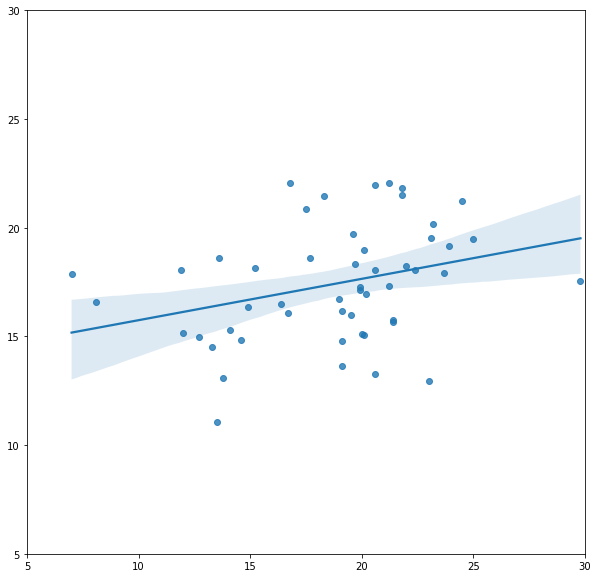

In [51]:
plt.figure(figsize=(10,10))
sns.regplot(x=Y_test.reshape(-1), y=preds.reshape(-1)).set(xlim=(5,30),ylim=(5,30)); 